# 1.importing packages

In [20]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
import pickle

#2.reading data

In [21]:
df = pd.read_excel(r"/content/Book1.xlsx")

In [22]:
df.describe()

,Annual Income,Female,Feel Fairly Compensated,Difference in Earnings between Physicians who Feels Fairly vs Unfairly Paid,overall_career_satisfaction,satisfied_w_income,would_choose_medicine_again,would_choose_the_same_specialty,survey_respondents_by_specialty,labels_below_are_correct_only_when_annual_income_is_in_descending_order
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,0.0
mean,297423.076923,0.269231,0.500000,70346.153846,0.535000,0.500769,0.611923,0.490000,0.035000,NaN
std,71044.872061,0.121784,0.064992,29090.125208,0.040025,0.066086,0.075420,0.104805,0.033615,NaN
min,204000.000000,0.070000,0.420000,36000.000000,0.470000,0.420000,0.470000,0.250000,0.010000,NaN
25%,228000.000000,0.192500,0.445000,49000.000000,0.510000,0.445000,0.562500,0.452500,0.010000,NaN
50%,293500.000000,0.255000,0.480000,60000.000000,0.530000,0.480000,0.615000,0.485000,0.020000,NaN
75%,358750.000000,0.357500,0.542500,85500.000000,0.557500,0.542500,0.680000,0.547500,0.047500,NaN
max,443000.000000,0.550000,0.660000,156000.000000,0.650000,0.660000,0.730000,0.740000,0.130000,NaN


In [23]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 11 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   Specialty                                                                    26 non-null     object 
 1   Annual Income                                                                26 non-null     int64  
 2   Female                                                                       26 non-null     float64
 3   Feel Fairly Compensated                                                      26 non-null     float64
 4   Difference in Earnings between Physicians who Feels Fairly vs Unfairly Paid  26 non-null     int64  
 5   overall_career_satisfaction                                                  26 non-null     float64
 6   satisfied_w_income                          

,Annual Income,Female,Feel Fairly Compensated,Difference in Earnings between Physicians who Feels Fairly vs Unfairly Paid,overall_career_satisfaction,satisfied_w_income,would_choose_medicine_again,would_choose_the_same_specialty,survey_respondents_by_specialty,labels_below_are_correct_only_when_annual_income_is_in_descending_order
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,0.0
mean,297423.076923,0.269231,0.500000,70346.153846,0.535000,0.500769,0.611923,0.490000,0.035000,NaN
std,71044.872061,0.121784,0.064992,29090.125208,0.040025,0.066086,0.075420,0.104805,0.033615,NaN
min,204000.000000,0.070000,0.420000,36000.000000,0.470000,0.420000,0.470000,0.250000,0.010000,NaN
25%,228000.000000,0.192500,0.445000,49000.000000,0.510000,0.445000,0.562500,0.452500,0.010000,NaN
50%,293500.000000,0.255000,0.480000,60000.000000,0.530000,0.480000,0.615000,0.485000,0.020000,NaN
75%,358750.000000,0.357500,0.542500,85500.000000,0.557500,0.542500,0.680000,0.547500,0.047500,NaN
max,443000.000000,0.550000,0.660000,156000.000000,0.650000,0.660000,0.730000,0.740000,0.130000,NaN


In [24]:
df.head()

,Specialty,Annual Income,Female,Feel Fairly Compensated,Difference in Earnings between Physicians who Feels Fairly vs Unfairly Paid,overall_career_satisfaction,satisfied_w_income,would_choose_medicine_again,would_choose_the_same_specialty,survey_respondents_by_specialty,labels_below_are_correct_only_when_annual_income_is_in_descending_order
0,Orthopedics,443000,0.09,0.44,156000,0.53,0.44,0.49,0.65,0.03,NaN
1,Cardiology,410000,0.12,0.48,98000,0.54,0.48,0.58,0.57,0.03,NaN
2,Dermatology,381000,0.38,0.66,114000,0.65,0.66,0.53,0.74,0.01,NaN
3,Gastroenterology,380000,0.15,0.48,86000,0.57,0.48,0.61,0.60,0.02,NaN
4,Radiology,375000,0.17,0.58,73000,0.53,0.58,0.49,0.53,0.03,NaN


#3.checking null values


In [25]:
df.isnull().sum()

Specialty                                                                       0
Annual Income                                                                   0
Female                                                                          0
Feel Fairly Compensated                                                         0
Difference in Earnings between Physicians who Feels Fairly vs Unfairly Paid     0
overall_career_satisfaction                                                     0
satisfied_w_income                                                              0
would_choose_medicine_again                                                     0
would_choose_the_same_specialty                                                 0
survey_respondents_by_specialty                                                 0
labels_below_are_correct_only_when_annual_income_is_in_descending_order        26
dtype: int64

#4.nan to zero

In [26]:
df = df.fillna(0)

In [27]:
df.describe()

,Annual Income,Female,Feel Fairly Compensated,Difference in Earnings between Physicians who Feels Fairly vs Unfairly Paid,overall_career_satisfaction,satisfied_w_income,would_choose_medicine_again,would_choose_the_same_specialty,survey_respondents_by_specialty,labels_below_are_correct_only_when_annual_income_is_in_descending_order
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.0
mean,297423.076923,0.269231,0.500000,70346.153846,0.535000,0.500769,0.611923,0.490000,0.035000,0.0
std,71044.872061,0.121784,0.064992,29090.125208,0.040025,0.066086,0.075420,0.104805,0.033615,0.0
min,204000.000000,0.070000,0.420000,36000.000000,0.470000,0.420000,0.470000,0.250000,0.010000,0.0
25%,228000.000000,0.192500,0.445000,49000.000000,0.510000,0.445000,0.562500,0.452500,0.010000,0.0
50%,293500.000000,0.255000,0.480000,60000.000000,0.530000,0.480000,0.615000,0.485000,0.020000,0.0
75%,358750.000000,0.357500,0.542500,85500.000000,0.557500,0.542500,0.680000,0.547500,0.047500,0.0
max,443000.000000,0.550000,0.660000,156000.000000,0.650000,0.660000,0.730000,0.740000,0.130000,0.0


#5.handling categorical values

In [28]:
le = LabelEncoder()

In [29]:
df['Specialty'] = le.fit_transform(df['Specialty'])
#df['Annual Income'] = le.fit_transform(df['Annual Income'])
df['Female'] = le.fit_transform(df['Female'])
df['Feel Fairly Compensated'] = le.fit_transform(df['Feel Fairly Compensated'])
df['overall_career_satisfaction'] = le.fit_transform(df['overall_career_satisfaction'])
df['satisfied_w_income'] = le.fit_transform(df['satisfied_w_income'])
df['would_choose_medicine_again'] = le.fit_transform(df['would_choose_medicine_again'])
df['would_choose_the_same_specialty'] = le.fit_transform(df['would_choose_the_same_specialty'])
df['survey_respondents_by_specialty'] = le.fit_transform(df['survey_respondents_by_specialty'])

In [30]:
df.head()

,Specialty,Annual Income,Female,Feel Fairly Compensated,Difference in Earnings between Physicians who Feels Fairly vs Unfairly Paid,overall_career_satisfaction,satisfied_w_income,would_choose_medicine_again,would_choose_the_same_specialty,survey_respondents_by_specialty,labels_below_are_correct_only_when_annual_income_is_in_descending_order
0,17,443000,1,2,156000,6,2,1,19,2,0.0
1,2,410000,2,5,98000,7,5,7,16,2,0.0
2,4,381000,18,11,114000,13,12,3,20,0,0.0
3,8,380000,3,5,86000,10,5,10,18,1,0.0
4,23,375000,5,9,73000,6,9,1,12,2,0.0


In [31]:
df.tail()

,Specialty,Annual Income,Female,Feel Fairly Compensated,Difference in Earnings between Physicians who Feels Fairly vs Unfairly Paid,overall_career_satisfaction,satisfied_w_income,would_choose_medicine_again,would_choose_the_same_specialty,survey_respondents_by_specialty,labels_below_are_correct_only_when_annual_income_is_in_descending_order
21,11,222000,15,5,43000,1,5,18,0,8,0.0
22,10,215000,16,7,45000,9,7,16,9,0,0.0
23,7,207000,17,7,40000,5,7,19,1,9,0.0
24,6,206000,17,1,56000,2,1,9,6,0,0.0
25,19,204000,20,7,52000,8,7,15,7,7,0.0


#6.descriptive

In [32]:
df.describe()

,Specialty,Annual Income,Female,Feel Fairly Compensated,Difference in Earnings between Physicians who Feels Fairly vs Unfairly Paid,overall_career_satisfaction,satisfied_w_income,would_choose_medicine_again,would_choose_the_same_specialty,survey_respondents_by_specialty,labels_below_are_correct_only_when_annual_income_is_in_descending_order
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.0
mean,12.500000,297423.076923,11.038462,5.153846,70346.153846,6.307692,5.269231,9.923077,9.653846,2.269231,0.0
std,7.648529,71044.872061,6.289552,3.120158,29090.125208,3.518741,3.317321,5.830424,5.635192,2.764890,0.0
min,0.000000,204000.000000,0.000000,0.000000,36000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,6.250000,228000.000000,6.250000,2.250000,49000.000000,4.000000,2.250000,5.250000,6.250000,0.000000,0.0
50%,12.500000,293500.000000,11.500000,5.000000,60000.000000,6.000000,5.000000,10.500000,8.500000,1.000000,0.0
75%,18.750000,358750.000000,16.750000,7.750000,85500.000000,8.750000,7.750000,15.000000,13.750000,3.750000,0.0
max,25.000000,443000.000000,21.000000,11.000000,156000.000000,13.000000,12.000000,19.000000,20.000000,9.000000,0.0


#7.visual analysis


#7.1 univariate analysis

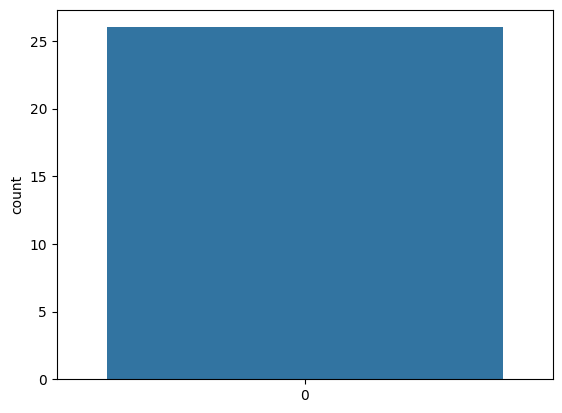

In [33]:
sns.countplot(df['Annual Income'])
plt.show()

#7.2 bivariate analysis

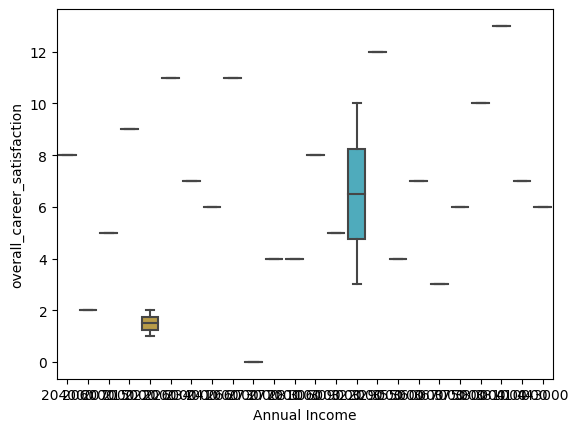

In [34]:
sns.boxplot(x='Annual Income',y='overall_career_satisfaction',data=df)
plt.show()

#7.3 multivariate analysis

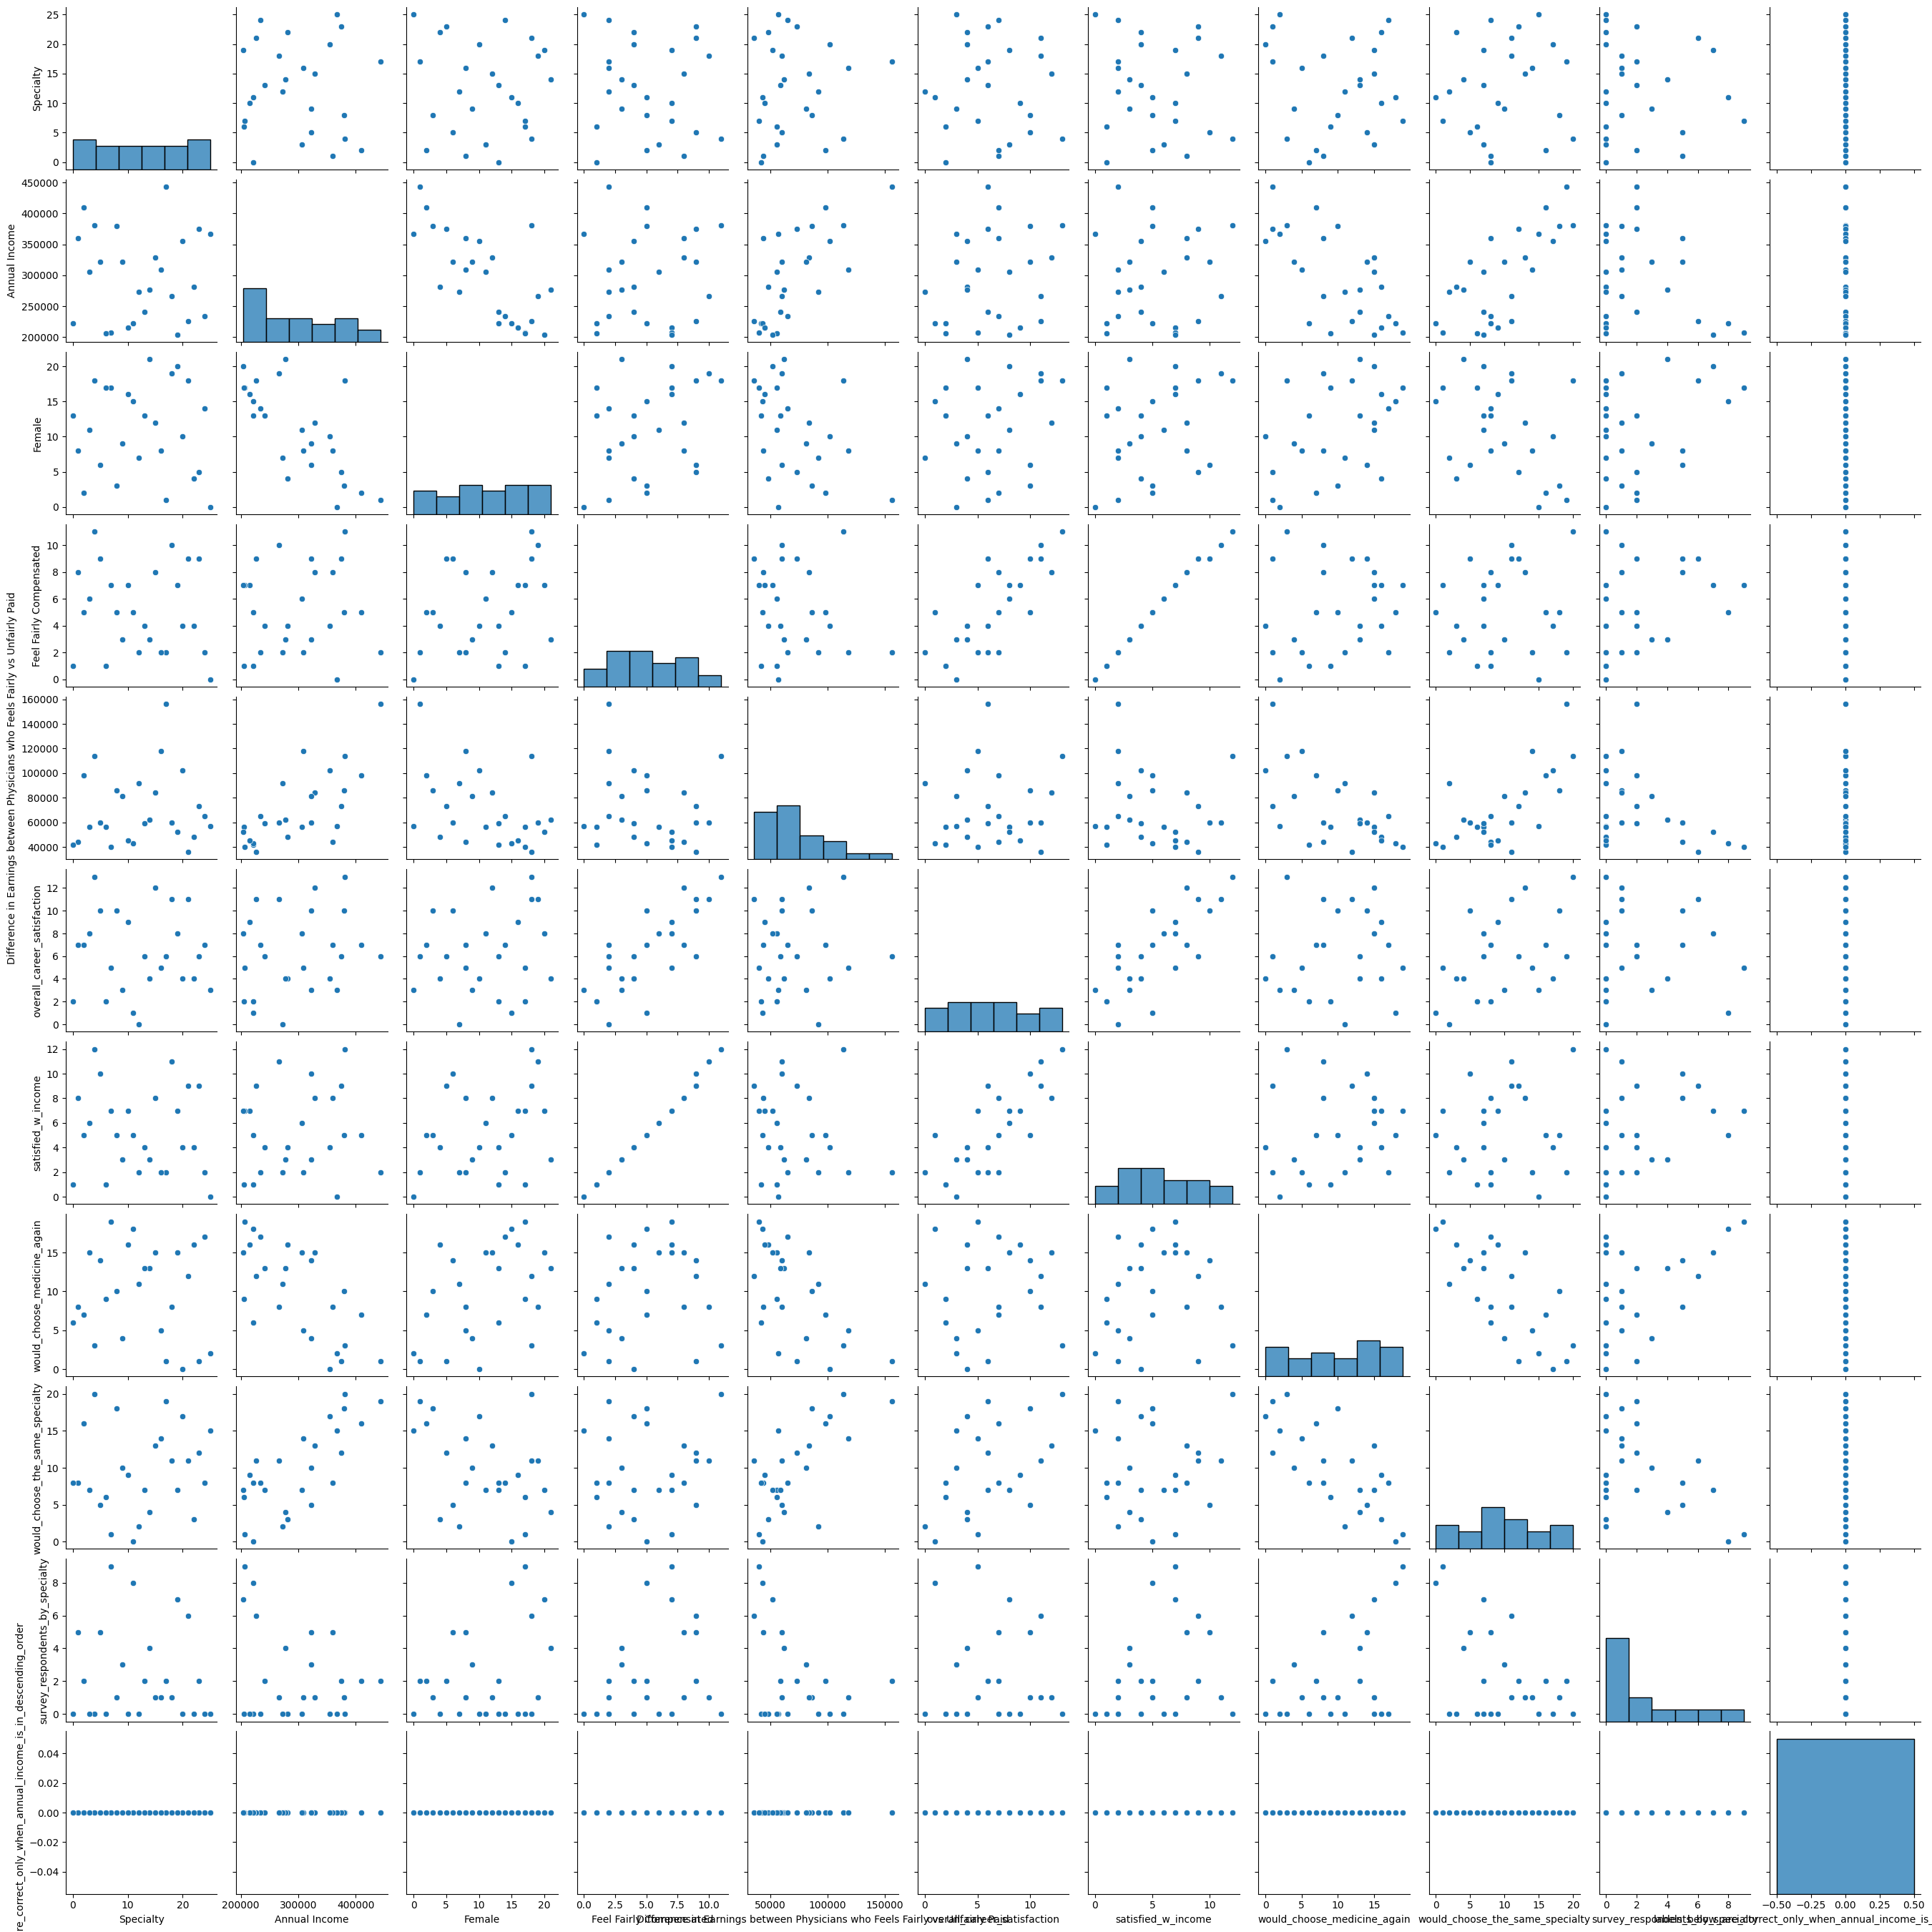

In [35]:
sns.pairplot(df)
plt.show()

#8.splitting data into train and test

In [36]:
x =df.drop(['Annual Income'],axis= 1)
y =df['Annual Income']

In [37]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 10 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   Specialty                                                                    26 non-null     int64  
 1   Female                                                                       26 non-null     int64  
 2   Feel Fairly Compensated                                                      26 non-null     int64  
 3   Difference in Earnings between Physicians who Feels Fairly vs Unfairly Paid  26 non-null     int64  
 4   overall_career_satisfaction                                                  26 non-null     int64  
 5   satisfied_w_income                                                           26 non-null     int64  
 6   would_choose_medicine_again                 

In [38]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [39]:
x_train , x_test, y_train, y_test = train_test_split(x , y, test_size = 0.3,random_state = 42)

#9.model building

#9.1 linear regression

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
reg = LinearRegression()

In [42]:
reg.fit(x_train, y_train)

LinearRegression()

In [43]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [44]:
y_train_pred = reg.predict(x_train)
y_test_pred = reg.predict(x_test)

In [45]:
y_train_pred[:5]

array([220479.37921464, 351367.55740039, 381000.00000003, 275401.62634332,
       304377.51070513])

In [46]:
y_test_pred[:5]

array([310477.62440713, 288945.7253523 , 486646.12947754, 224277.32562086,
       375654.9695799 ])

#9.2 accuracy

In [47]:
r2_score(y_train,y_train_pred)*100

86.63672466660461

#9.3 mean square error

In [48]:
mean_squared_error(y_test,y_test_pred)

1389079516.6137962

#10.random forest regressor

In [49]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
rf = RandomForestRegressor(n_estimators=100,random_state=42)

In [51]:
rf.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [52]:
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

In [53]:
r2_score(y_train,y_train_pred)*100

91.80452955975461

In [54]:
mean_squared_error(y_train,y_train_pred)

359840088.8888889

In [55]:

r2_score(y_test,y_test_pred)*100

49.84810796921458

In [56]:
mean_squared_error(y_test,y_test_pred)

2561727300.0

#11.decision tree regressor

In [57]:
from sklearn.tree import DecisionTreeRegressor

In [58]:
dtr = DecisionTreeRegressor(random_state=42)

In [59]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

In [60]:
y_train_pred = dtr.predict(x_train)
y_test_pred = dtr.predict(x_test)

In [61]:
y_train_pred[:5]

array([207000., 367000., 381000., 306000., 273000.])

In [62]:
y_test_pred[:5]

array([380000., 234000., 380000., 241000., 355000.])

In [63]:
r2_score(y_train,y_train_pred)*100

100.0

In [64]:
mean_squared_error(y_train,y_train_pred)

0.0

In [65]:
r2_score(y_test,y_test_pred)*100

63.39031164731361

In [66]:

mean_squared_error(y_test,y_test_pred)

1870000000.0

#12.gradient boosting regressor

In [67]:
import xgboost as xgb

In [68]:
xg_reg = xgb.XGBRegressor()

In [69]:
xg_reg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [70]:
y_train_pred = xg_reg.predict(x_train)
y_test_pred = xg_reg.predict(x_test)

In [71]:
r2_score(y_train,y_train_pred)*100

99.9999999999722

In [72]:
mean_squared_error(y_train,y_train_pred)

0.001220703125

In [73]:
r2_score(y_test,y_test_pred)*100

47.994969977598345

In [74]:
mean_squared_error(y_test,y_test_pred)

2656384430.4005127

In [75]:
r2_score(y_train,y_train_pred)*100

99.9999999999722

#13.testing the model

In [76]:
reg.predict([[11,5,1,5,18,0,8,0,12,4]])

array([455909.95744194])

In [77]:
reg.predict([[23,9,6,9,1,12,2,0,15,22]])

array([434355.49158077])

In [78]:
reg.predict([[17,2,6,2,1,6,19,2,0,44]])

array([187628.45379741])

In [79]:
reg.predict([[6,12,22,56,32,12,11,10,28,8]])

array([354319.15947098])

In [80]:
reg.predict([[20,7,11,6,30,1,19,16,2,5]])

array([189827.37509986])

In [81]:
reg.predict([[3,37,22,21,10,22,11,22,6,8]])

array([33554.9892287])

#14.save the best model

In [82]:
import pickle

In [83]:
with open("salary.pkl","wb") as f: pickle.dump(reg,f)